# Measuring Success of the New Explore Page

In order to measure the success of new Explore page, the WRI came up with diff metrics.
In particular:

- Number of accounts created
- Number of collections created

In [1]:
import json
import requests
from pprint import pprint
import getpass
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
def get_token(email):
    api_url = 'http://api.resourcewatch.org'
    password = getpass.getpass('Resource Watch login password:')

    payload = {
        "email": f"{email}",
        "password": f"{password}"
    }

    url = f'{api_url}/auth/login'

    headers = {'Content-Type': 'application/json'}

    r = requests.post(url, data=json.dumps(payload), headers=headers)
    
    return r.json().get('data').get('token')

In [3]:
OAUTH = get_token(email='iker.sanchez@vizzuality.com')

Resource Watch login password: ·········


### Number of accounts created

In [4]:
#Post new dataset

url = f'https://api.resourcewatch.org/auth/user?app=rw&page[number]=1&page[size]=2000",'

headers = {'Authorization': 'Bearer ' + OAUTH, 'Content-Type': 'application/json', 'Cache-Control': 'no-cache'}

r = requests.get(url, headers=headers)

data = pd.DataFrame(r.json().get('data'))

In [5]:
data['nUsers'] = 1

In [6]:
data['createdAt'] =  pd.to_datetime(data['createdAt'])

In [7]:
data.head()

,id,email,name,photo,createdAt,updatedAt,role,extraUserData,nUsers
0,57bc261ff098ce980079879f,andres.gnlez@gmail.com,Andrés,,2017-12-04 12:03:36.928000+00:00,2019-11-12T17:23:18.131Z,USER,"{'apps': ['gfw', 'prep', 'rw']}",1
1,57bc260ef098ce9800798660,james.harris.anderson@gmail.com,James Anderson,,2018-03-07 17:23:44.964000+00:00,2020-05-11T10:43:01.265Z,USER,"{'apps': ['gfw', 'rw']}",1
2,57bc260ff098ce980079866a,alicia.arenzana@vizzuality.com,NaN,NaN,2017-09-08 09:45:59.474000+00:00,2020-05-11T10:43:01.265Z,USER,"{'apps': ['gfw', 'rw', 'prep']}",1
3,57bc2622f098ce98007987d6,hugozerda@gmail.com,NaN,NaN,2017-12-04 19:50:29.322000+00:00,2020-05-11T10:43:01.265Z,USER,"{'apps': ['gfw', 'rw']}",1
4,57bc2614f098ce98007986cb,adammulligan@fastmail.fm,NaN,NaN,2018-04-11 20:24:24.205000+00:00,2020-05-11T10:43:01.265Z,USER,"{'apps': ['gfw', 'rw']}",1


In [8]:
df = data.groupby([pd.Grouper(key='createdAt', freq='M')]).sum().reset_index()
df.head()

,createdAt,nUsers
0,2016-08-31 00:00:00+00:00,7
1,2016-09-30 00:00:00+00:00,2
2,2016-10-31 00:00:00+00:00,0
3,2016-11-30 00:00:00+00:00,0
4,2016-12-31 00:00:00+00:00,3


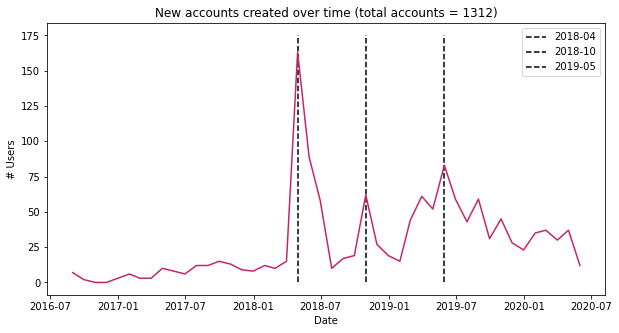

In [9]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 5))

dates = ['2018-04-30', '2018-10-31', '2019-05-31']

for date in dates:
    label = date[:7]
    date = datetime.strptime(date, '%Y-%m-%d')
    ax.plot([date, date],[0, 175], color='k', linestyle ='--', label=label)

# Add x-axis and y-axis
ax.plot(df['createdAt'],
        df['nUsers'],
        color='#c52469')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="# Users",
       title=f'New accounts created over time (total accounts = {str(len(data))})')

ax.legend()
plt.show()
